In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import anderson

In [3]:
df=sns.load_dataset("penguins")
df.columns = ["Species", "Island", "Bill_Length(mm)", "Bill_Depth(mm)", "Flipper_Length(mm)", "Body_Mass(g)", "Sex"]


In [4]:
df['Species'].value_counts()

Species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [5]:
# handling missing value 
# Import the SimpleImputer class from scikit-learn's impute module
from sklearn.impute import SimpleImputer
# Create an instance of SimpleImputer with the 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')
# Use the imputer to fill missing values in the DataFrame 'df'
df.iloc[:,:] = imputer.fit_transform(df)

In [6]:
chinstrap = df.loc[df['Species'] == 'Chinstrap']
adelie  = df.loc[df['Species'] == 'Adelie']
gentoo = df.loc[df['Species'] == 'Gentoo']


In [7]:
adelie

,Species,Island,Bill_Length(mm),Bill_Depth(mm),Flipper_Length(mm),Body_Mass(g),Sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,Male
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female


c:\Users\anton\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\anton\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anton\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\anton\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

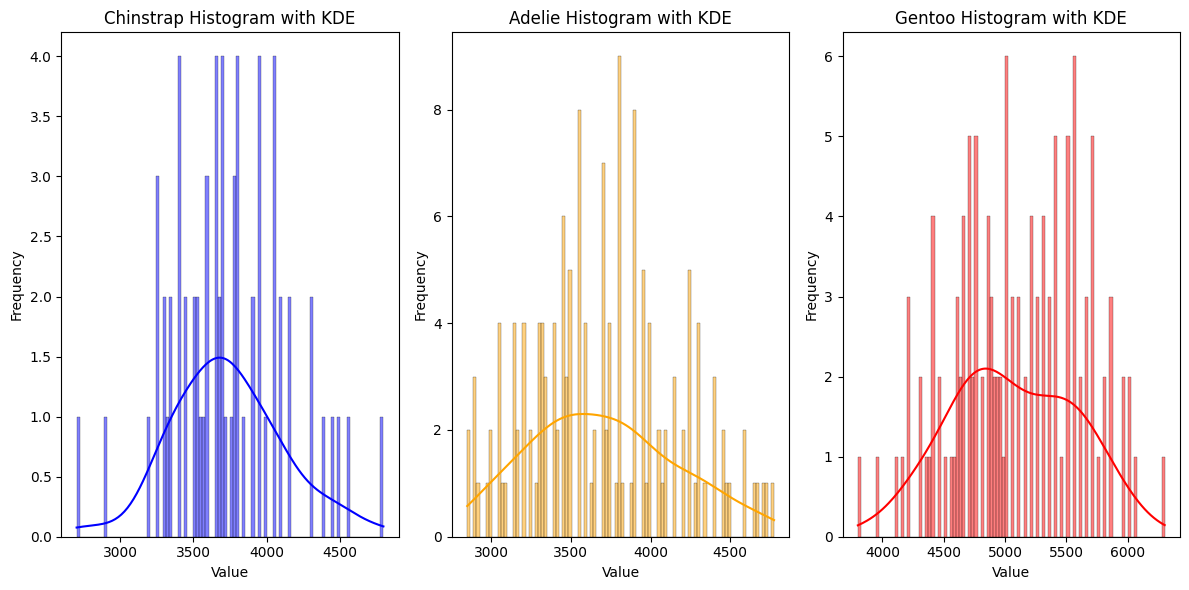

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check distribution for "Body_Mass(g)"
# Define the variable as a selection of the DataFrame
chinstrap_Body_Mass = chinstrap['Body_Mass(g)']
adelie_Body_Mass = adelie['Body_Mass(g)']
gentoo_Body_Mass = gentoo['Body_Mass(g)']

# Create a figure
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# Histogram for Chinstrap
sns.histplot(chinstrap_Body_Mass, bins=100, kde=True, color='blue', ax=axes[0])
axes[0].set_title("Chinstrap Histogram with KDE")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")

# Histogram for Adelie
sns.histplot(adelie_Body_Mass, bins=100, kde=True, color='orange', ax=axes[1])
axes[1].set_title("Adelie Histogram with KDE")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Frequency")

# Histogram for Gentoo
sns.histplot(gentoo_Body_Mass, bins=100, kde=True, color='red', ax=axes[2])
axes[2].set_title("Gentoo Histogram with KDE")
axes[2].set_xlabel("Value")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [ ]:
import scipy.stats as stats

# https://www.geeksforgeeks.org/how-to-perform-a-shapiro-wilk-test-in-python/
alpha = 0.05
print('\033[1m' + 'Shapiro Normalization test for Chrinstop Body Mass Variabe' + '\033[0m')
statistic, p_value = stats.shapiro(chinstrap_Body_Mass)
print(f'The p_value of Chrinstop is {p_value}')
if p_value > alpha:
    print(f'The data of Chrinstop appears to be normally distributed'+'\n')
else:
    print("The data of Chrinstop does not appear to be normally distributed"+'\n')
      
statistic, p_value = stats.shapiro(adelie_Body_Mass)
print('\033[1m' + 'Shapire Normalization test for Adelie Body Mass Variabe' + '\033[0m')
print(f'The p_value of Adelie is {p_value}')
if p_value > alpha:
    print(f'The data of Adelie appears to be normally distributed'+'\n')
else:
    print("The data of Adelie does not appear to be normally distributed"+'\n')
    
statistic, p_value = stats.shapiro(gentoo_Body_Mass )
print('\033[1m' + 'Shapire Normalization test for Gentoo Body Mass Variabe' + '\033[0m')
print(f'The p_value of Gentoo is {p_value}')
if p_value > alpha:
    print(f'The data of Gentoo appears to be normally distributed'+'\n')
else:
    print("The data of Gentoo does not appear to be normally distributed"+'\n')
    
    

In [ ]:
from distfit import distfit

# Initialize distfit
dist_gentoo_BM = distfit(bins=50, smooth=10)

# Determine best-fitting probability distribution for data
dist_gentoo_BM.fit_transform(gentoo_Body_Mass)
# Print summary of evaluated distributions
print(dist_gentoo_BM.summary)

In [ ]:
# Plot results
dist_gentoo_BM.plot()

In [ ]:
dist_gentoo_BM.plot_summary()

In [ ]:
# Determine best-fitting probability distribution for data
dist_adelie_BM = distfit(bins=50, smooth=10)
dist_adelie_BM.fit_transform(adelie_Body_Mass)
dist_adelie_BM.plot()
dist_adelie_BM.plot_summary()

In [ ]:
# Check distribution for "Body_Mass(g)"
# Define the variable as a selection of the DataFrame
chinstrap_Bill_Depth = chinstrap['Bill_Depth(mm)']
adelie_Bill_Depth = adelie['Bill_Depth(mm)']
gentoo_Bill_Depth = gentoo['Bill_Depth(mm)']

# Create a figure
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# Histogram for Chinstrap
sns.histplot(chinstrap_Bill_Depth, bins=100, kde=True, color='blue', ax=axes[0])
axes[0].set_title("Chinstrap Histogram")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")

# Histogram for Adelie
sns.histplot(adelie_Bill_Depth, bins=100, kde=True, color='orange', ax=axes[1])
axes[1].set_title("Adelie Histogram")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Frequency")

# Histogram for Gentoo
sns.histplot(gentoo_Bill_Depth, bins=100, kde=True, color='red', ax=axes[2])
axes[2].set_title("Gentoo Histogram")
axes[2].set_xlabel("Value")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [ ]:
# Build three dataframes with the data of each single species
# Filter the main DataFrame 'df' to create three separate DataFrames for each penguin species
chinstrap = df.loc[df['Species'] == 'Chinstrap']
adelie  = df.loc[df['Species'] == 'Adelie']
gentoo = df.loc[df['Species'] == 'Gentoo']

NameError: name 'df' is not defined

After filtering, the code extracts the 'Body_Mass(g)' data for each penguin species and stores them in separate variables.

In [ ]:
# Check distribution for "Body_Mass(g)"
# Define separate variables to store the 'Body_Mass(g)' data for each penguin species
chinstrap_Body_Mass = chinstrap['Body_Mass(g)']
adelie_Body_Mass = adelie['Body_Mass(g)']
gentoo_Body_Mass = gentoo['Body_Mass(g)']

The code them creates a figure with three side-by-side subplots [[]](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html), with each subplot dedicated to a different penguin species (Chinstrap, Adelie, and Gentoo).
In each subplot, it plots a histogram of the body mass distribution for the respective species.
Each subplot is customized with unique colors, titles, and labels, the layout of the subplots is adjusted to ensure that they are properly spaced and presented for clear visualization and finally the three plots are displayed.

In [ ]:
# Create a figure with three subplots side by side
# Initialize a figure with a single row and three columns of subplots
# The figure size is set to 12 inches in width and 6 inches in height
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# Plot a histogram for Chinstrap penguins' body mass
# Display the histogram in the first subplot (axes[0])
sns.histplot(chinstrap_Body_Mass, bins=100, kde=True, color='blue', ax=axes[0])
axes[0].set_title("Chinstrap Histogram")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")

# Plot a histogram for Adelie penguins' body mass
# Display the histogram in the second subplot (axes[1])
sns.histplot(adelie_Body_Mass, bins=100, kde=True, color='orange', ax=axes[1])
axes[1].set_title("Adelie Histogram")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Frequency")

# Plot a histogram for Gentoo penguins' body mass
# Display the histogram in the third subplot (axes[2])
sns.histplot(gentoo_Body_Mass, bins=100, kde=True, color='red', ax=axes[2])
axes[2].set_title("Gentoo Histogram with KDE")
axes[2].set_xlabel("Value")
axes[2].set_ylabel("Frequency")

# Adjust the layout of subplots for better visualization
plt.tight_layout()
# Display the figure with the three histograms side by side
plt.show()

From a visual examination, Chinstrap look normally distributed. In a normal distribution, data is symmetrically distributed with no skew. Most of the data points are concentrated near the middle, and as you move away from the middle, you find fewer and fewer data points. [[]](https://www.scribbr.com/statistics/central-tendency/#:~:text=Skewed%20distributions%20In%20skewed%20distributions%2C%20more%20values%20fall,tail%20tells%20you%20the%20side%20of%20the%20skew).

However, Adelie and Gentoo doesn' look be symmetrical but more a Right-skewed data distribution. This mean we need to identify what of skewed distribution they refer to [[]](https://statisticsbyjim.com/basics/skewed-distribution/).

We can Firts perform a Shapiro test on **chinstrap_Body_Mass** to confirm the data is normally distributed [[]](https://www.statology.org/normality-test-python/). The shapiro test cannot be used on his own because the result can vary based on the shape of the dataset. However, can be use to confirm a visual check that already show a normal variable [[]](https://quantifyinghealth.com/report-shapiro-wilk-test/). We set the significance level (alpha) to 0.05 because it's a common threshold.  If the P value is greater than 0.05, the answer is Yes. If the P value is less than or equal to 0.05, the answer is No [[]](https://www.graphpad.com/guides/prism/latest/statistics/stat_interpreting_results_normality.htm).

In [ ]:
# Import the required library for the Shapiro-Wilk test
import scipy.stats as stats

# Set the significance level (alpha) for the test
alpha = 0.05

# Print a bold title for the Shapiro-Wilk test for Chinstrap penguin body mass variable
print('\033[1m' + 'Shapiro Normality Test for Chinstrap Body Mass Variable' + '\033[0m')

# Perform the Shapiro-Wilk test on the Chinstrap penguin body mass data
# This test checks if the data follows a normal distribution.
statistic, p_value = stats.shapiro(chinstrap_Body_Mass)

# Print the p-value obtained from the test
print(f'The p-value of Chinstrap penguin body mass data is {p_value}')

# Check if the p-value is greater than the chosen significance level (alpha)
if p_value > alpha:
    print('The data of Chinstrap penguins appears to be normally distributed'+'\n')
else:
    print('The data of Chinstrap penguins does not appear to be normally distributed'+'\n')

We can now move to check what will be the best distribution fit for adelie_Body_Mass. 
From a visula point of view they looks beta, gamma or log normal. Those are all skewed probabilities.
There are several instrument we can use, I personally decide to use the disfit library [[]](https://erdogant.github.io/distfit/pages/html/index.html). Distfit is a Python library that automatically analyzes data and identifies the best-fitting probability distribution out of 89 options, aiding in understanding the data's underlying pattern or shape [[]](https://www.kdnuggets.com/2021/09/determine-best-fitting-data-distribution-python.html).

First, we will generate some data; initialize the distfit model; and fit the data to the model.

In [ ]:
# Import the 'distfit' class from the 'distfit' library
from distfit import distfit

# Initialize a 'distfit' model with specified settings, such as the number of bins and smoothing
dist_gentoo_BM = distfit(bins=50, smooth=10)

# Fit the data (gentoo_Body_Mass) to the 'distfit' model to determine the best-fitting probability distribution
dist_gentoo_BM.fit_transform(gentoo_Body_Mass)

# Print a summary of the evaluated probability distributions to see which one best fits the data
print(dist_gentoo_BM.summary)

From the data we've analyzed, it appears that the beta distribution is the best-fitting distribution for our dataset. To gain a better understanding, we can now create plots for the three best-fitting distributions using the 'distfit' function. Additionally, we can use the 'plot_summary' function to visualize how well each variable adapts to these distributions.

In [ ]:
# Plot the results of the 'distfit' analysis for the Gentoo penguin body mass data
dist_gentoo_BM.plot(n_top=3)
# Generate a summary plot for the 'distfit' analysis
dist_gentoo_BM.plot_summary()

From above we can say that the beta function is the one who fit better the distribution of the **gentoo_Body_Mass**
 dataframe.

We can now repet the spet above for the variable **adelie_Body_Mass**.

In [ ]:
# Initialize a 'distfit' model for the Adelie penguin body mass data with specific settings
dist_adelie_BM = distfit(bins=50, smooth=10)

# Fit the Adelie penguin body mass data to the 'distfit' model to find the best-fitting probability distribution
dist_adelie_BM.fit_transform(adelie_Body_Mass)

# Plot the results of the 'distfit' analysis, showing how well the distribution fits the Adelie penguin body mass data
dist_adelie_BM.plot(n_top=3)

# Generate a summary plot to visualize the adaptation of different probability distributions to the data
dist_adelie_BM.plot_summary()

From the above we can see that the distribution that better apply to  **adelie_Body_Mass** is the gamma distribution.

Here the differents distributions that apply to each species for the body_mass value:

| Species | Type        | 
| --------- | ----------- | 
|Chinstrap | Normal | 
| Adelie   | Gamm
| Gentoo | Beta |

In [20]:
p = 0.75

def entropy_cal(p):
    entropy =-((1-p)*np.log2(1-p) + p*np.log2(p))
    return entropy
    
print(entropy_cal(p))   

0.8112781244591328


0.13081203594113697
1.2475562489182659


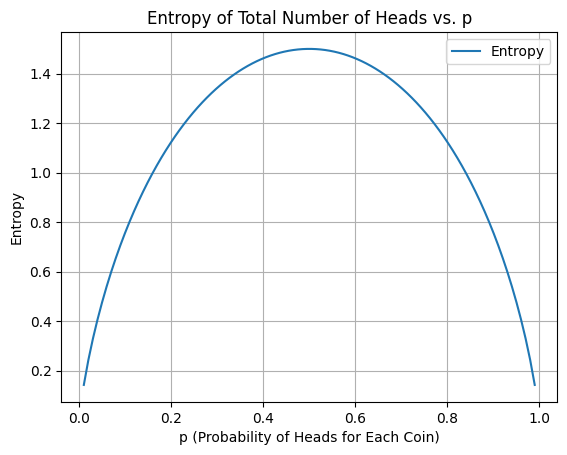

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy

def entropy_cal(p):
    # Probability mass function for X
    px_0 = (1 - p)**2
    px_1 = 2*p * (1 - p)
    px_2 = p**2

    # Entropy calculation
    entropy = - (px_0 * np.log2(px_0) + px_1 * np.log2(px_1) + px_2 * np.log2(px_2) )

    return entropy

# Values of p
p_values = np.linspace(0.01, 0.99, 100)

# Calculate entropy for each p
entropy_values = [entropy_cal(p) for p in p_values]

p= 0.75
coin_toss = [0.75, 0.25]
print(entropy(coin_toss,2))

print(entropy_cal(p))

# Plotting
plt.plot(p_values, entropy_values, label='Entropy')
plt.title('Entropy of Total Number of Heads vs. p')
plt.xlabel('p (Probability of Heads for Each Coin)')
plt.ylabel('Entropy')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
import numpy as np
from scipy.stats import entropy
coin_toss = [0.75, 0.25]
entropy(coin_toss, base=2)


0.8112781244591328